In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date


# 1. Lectura de datos 

### Datos del banco central

In [148]:
banco_central_dataset = pd.read_csv('banco_central.csv') 
banco_central_dataset.sample(5)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
459,1996-02-01 00:00:00 UTC,458.833.414,668.535.588,601.127.402,624.915.874,639.699.684,364.584.411,354.800.099,470.363.443,431.527.375,...,871.021.555,NaN,512.959.277,NaN,61.663.169,NaN,NaN,NaN,NaN,NaN
164,1971-07-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,2007-10-01 00:00:00 UTC,817.756.272,889.235.353,995.152.485,921.645.578,713.233.855,64.197.267,811.789.781,825.682.093,785.935.575,...,910.694.221,NaN,979.525.034,NaN,989.902.432,471.004.696,NaN,NaN,NaN,NaN
579,2006-02-01 00:00:00 UTC,700.239.018,861.479.243,857.846.873,793.723.379,918.061.103,602.686.014,607.054.068,710.786.722,671.012.767,...,897.757.823,NaN,782.964.826,NaN,842.112.091,405.848.266,NaN,NaN,NaN,NaN
380,1989-07-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110.897.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
banco_central_dataset.shape

(614, 85)

### Datos de Precipitaciones

In [150]:
precipitaciones_dataset = pd.read_csv('precipitaciones.csv') 

In [151]:
precipitaciones_dataset.sample(5)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
258,2010-02-01,0.924379,0.360552,0.446527,0.131690,16.486556,71.463285,94.312871,152.137545
22,1982-12-01,0.844163,0.174903,4.412416,4.235860,2.219193,1.729741,2.834791,17.616395
380,2013-01-01,10.155732,9.476023,9.722886,6.645054,7.531215,10.610359,21.286717,36.419186
19,2001-04-01,6.413627,19.846299,31.536242,47.690760,57.183003,62.417813,76.776032,110.260142
282,1980-08-01,13.563444,20.806331,27.054480,41.436310,80.076847,184.348025,269.600678,356.585297


In [152]:
precipitaciones_dataset.shape

(496, 9)

# 2. Análisis de datos - Creación de variables

### **Función para verificar los datos faltantes**

In [153]:
def getPercentOfMissingData(dataframe):
  percent_of_missing_data = round(((dataframe.isnull().sum(axis=0) / dataframe.shape[0]) * 100),2).sort_values(ascending=False)
  missing_data = pd.concat(
      [
          percent_of_missing_data
      ], 
      axis=1, 
      keys=['Total', '%']
  )
  return missing_data

### **Observemos los datos del banco central**

Vemos que hay 80% de registros nulos en varias columnas en todo el dataset

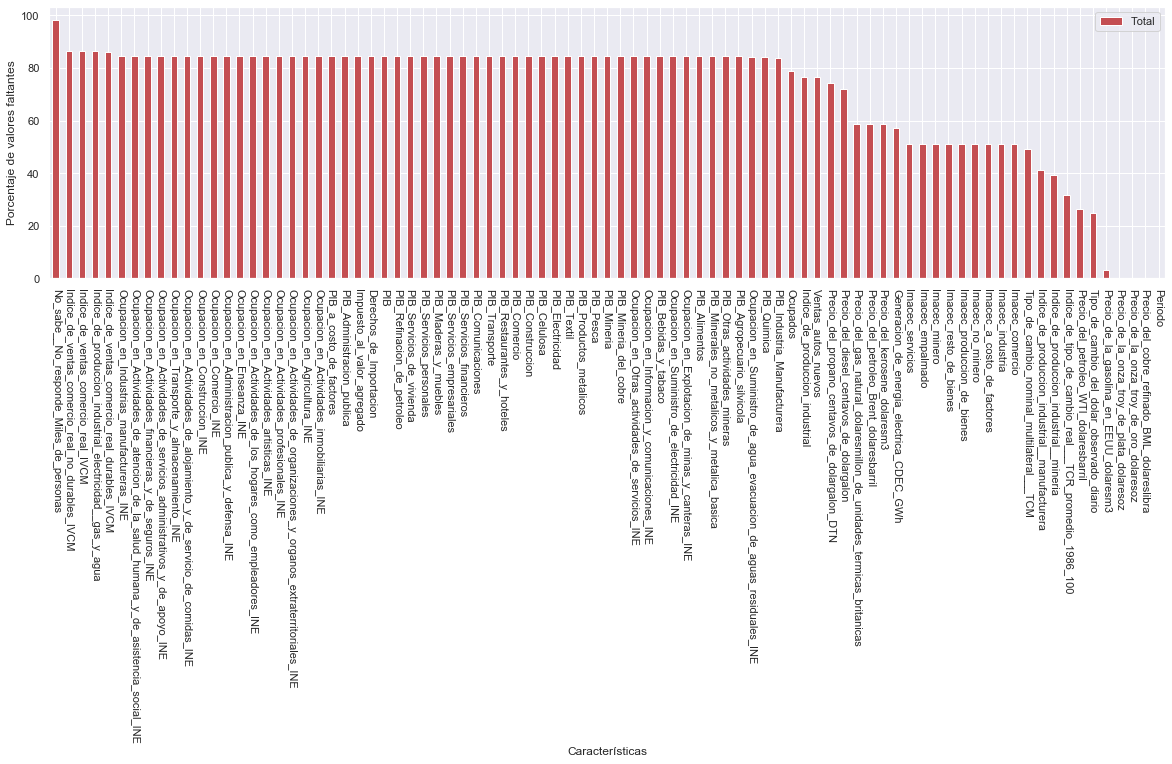

In [154]:
banco_central_dataset_missing_data = getPercentOfMissingData(banco_central_dataset)
ax = banco_central_dataset_missing_data.plot.bar(
    rot=270, 
    color='r', 
    figsize=(20,5)
)
plt.xlabel('Características')
plt.ylabel('Porcentaje de valores faltantes')
plt.show()

Se añadirán dos columnas que facilitará el filtro por año y mes

In [155]:
banco_central_dataset[['Anio', 'Mes']] = banco_central_dataset.Periodo.str.split('-', expand=True)[[0, 1]]
banco_central_dataset = banco_central_dataset.sort_values(by=['Anio', 'Mes'], axis=0).reset_index(drop=True)

In [156]:
banco_central_dataset['Anio'] = banco_central_dataset['Anio'].astype(int)
banco_central_dataset['Mes'] = banco_central_dataset['Mes'].astype(int)

**Diviendo el dataset del banco central en dos periodos para verificar si hay columnas completamente vacías**

El primer periodo será con entre los años 1970 y 2000

In [157]:
df_menor_2000 = banco_central_dataset.loc[banco_central_dataset.Anio <= 2000]

In [158]:
df_menor_2000.shape

(372, 87)

In [159]:
df_menor_2000_dataset_missing_data = getPercentOfMissingData(df_menor_2000)

In [160]:
df_menor_2000_dataset_missing_data_igual_100 = df_menor_2000_dataset_missing_data.loc[df_menor_2000_dataset_missing_data.Total==100]
df_menor_2000_dataset_missing_data_igual_100.shape

(56, 1)

Hay 56 columnas que no presentan ningún registro en el primer periodo

In [161]:
df_menor_2000_dataset_missing_data_mayor_80 = df_menor_2000_dataset_missing_data.loc[(df_menor_2000_dataset_missing_data.Total>=80) & (df_menor_2000_dataset_missing_data.Total<100)]
df_menor_2000_dataset_missing_data_mayor_80.shape

(19, 1)

Hay 19 columnas que solo presentan aproximadamente 20% de sus datos en el primer periodo

In [162]:
df_menor_2000_menor_80 = df_menor_2000_dataset_missing_data.loc[df_menor_2000_dataset_missing_data.Total<80]
df_menor_2000_menor_80.shape

(12, 1)

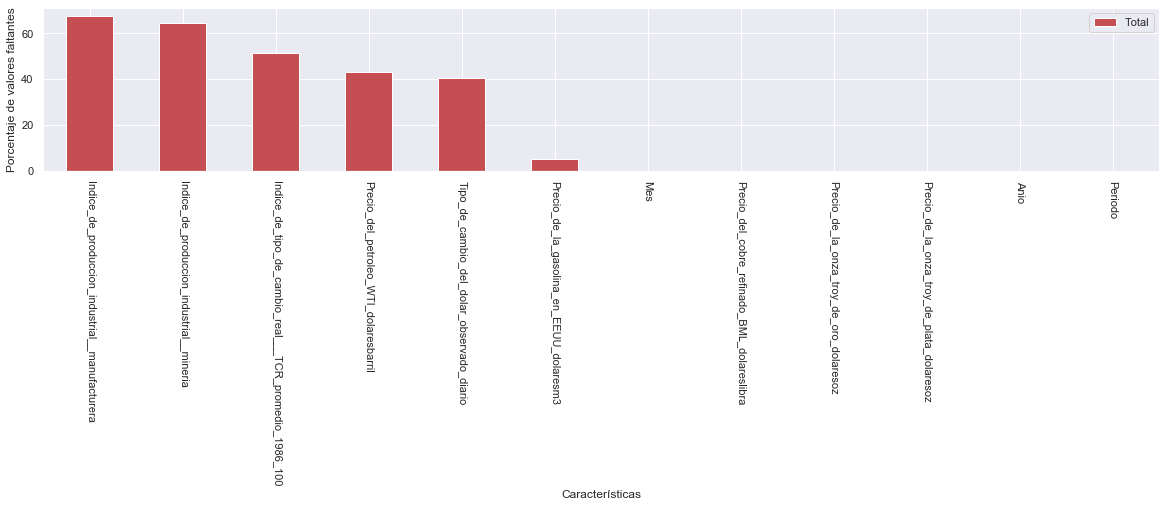

In [163]:
ax = df_menor_2000_menor_80.plot.bar(
    rot=270, 
    color='r', 
    figsize=(20,3)
)

plt.xlabel('Características')
plt.ylabel('Porcentaje de valores faltantes')
plt.show()


El segundo periodo será con entre los años 2001 y 2020

In [164]:
df_mayor_2000 = banco_central_dataset.loc[banco_central_dataset.Anio > 2000]

In [165]:
df_mayor_2000_dataset_missing_data = getPercentOfMissingData(df_mayor_2000)

In [166]:
df_mayor_2000_dataset_missing_data_igual_100 = df_mayor_2000_dataset_missing_data.loc[df_mayor_2000_dataset_missing_data.Total==100]
df_mayor_2000_dataset_missing_data_igual_100.shape

(0, 1)

### Del segundo periodo analizado (> al año 2000) se puede observar que

  - No hay columnas que tengan todos los registros NaN. 
  - La columna de No_Sabe_No_Responde_Miles_de_Personas es la columna que menos registros tiene.
  - Las columnas de PIB y Ocupacion cuentan con aproximadamente 60% de registros vacios.
  - Las columnas de imanec y precio son las columnas que cuentan con más registros.

In [167]:
df_mayor_2000_dataset_missing_data_not_100 = df_mayor_2000_dataset_missing_data.loc[df_mayor_2000_dataset_missing_data.Total<100]

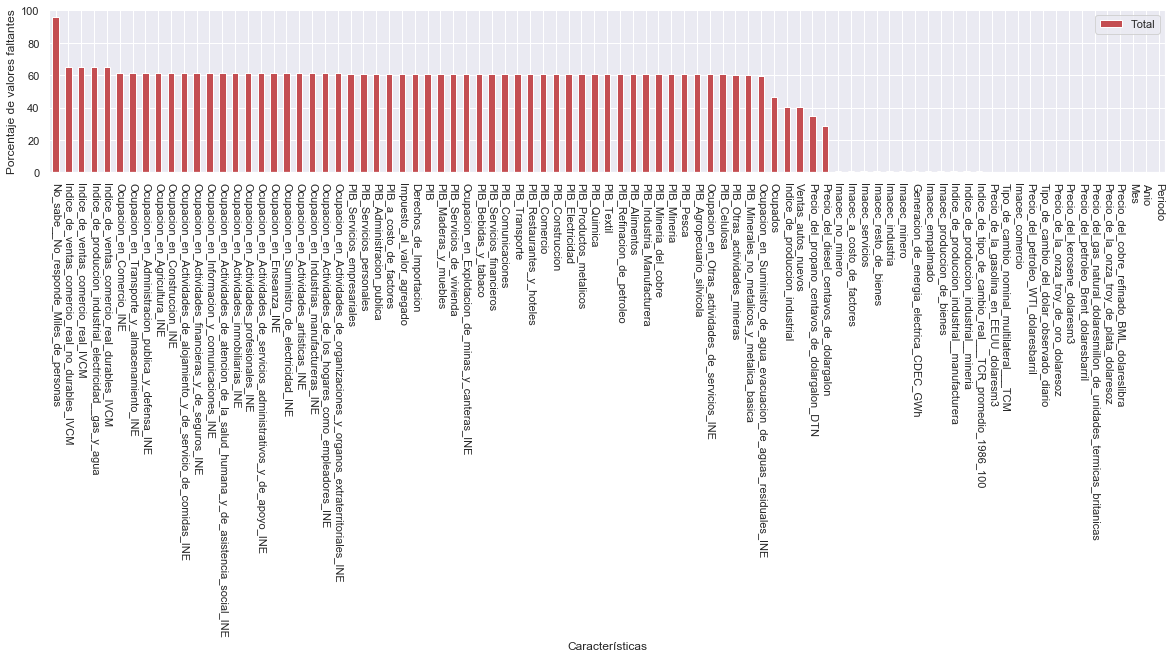

In [168]:
ax = df_mayor_2000_dataset_missing_data_not_100.plot.bar(
    rot=270, 
    color='r', 
    figsize=(20,3)
)

plt.xlabel('Características')
plt.ylabel('Porcentaje de valores faltantes')
plt.show()


#### Verificando valores que tienen repetidos y no correctos

Hay dos registros repetidos en el periodo mayor al año 2000

In [169]:
banco_central_dataset.duplicated(subset=['Mes', 'Anio']).sum() 

2

**Se encontraron dos registros de Agosto del 2019 repetidos**

In [170]:
banco_central_dataset[banco_central_dataset['Anio']==2019]['Mes'].value_counts()

8     2
12    1
11    1
10    1
9     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: Mes, dtype: int64

Se eliminan los registros duplicados del dataset del banco central

In [171]:
banco_central_dataset = banco_central_dataset.drop_duplicates(subset=['Anio', 'Mes'])
banco_central_dataset.duplicated(subset=['Mes', 'Anio']).sum() 

0

**Se encontró un registro del mes 13**

In [172]:
banco_central_dataset['Mes'].value_counts().sort_values

<bound method Series.sort_values of 11    51
10    51
9     51
8     51
7     51
6     51
5     51
4     51
3     51
2     51
1     51
12    50
13     1
Name: Mes, dtype: int64>

In [173]:
banco_central_dataset['Mes'] = banco_central_dataset['Mes'].replace('13', '12')

Ahora convertiremos las columnas que son de tipo de objeto a numericas para poder visualizar los valores de cada caracteristica

In [176]:
def convertToNumber(df):
    for col in df.columns:
        if(col not in ['Periodo','Anio','Mes']):
            if(df[col].dtype !='float64'):
                df[col] = df[col].str.replace('.','').replace('a', np.nan).astype(float)
    return df

In [177]:
banco_central_dataset = convertToNumber(banco_central_dataset)
banco_central_dataset.sample(3)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Mes
194,1986-03-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,3
258,1991-07-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,309011613.0,NaN,532873755.0,NaN,NaN,NaN,NaN,NaN,1991,7
553,2016-02-01 00:00:00 UTC,998261045.0,106199025.0,959563643.0,960155356.0,12251467.0,109107394.0,939057319.0,100020237.0,100265976.0,...,926341356.0,10411144.0,988458378.0,597682917.0,997429386.0,101065886.0,941587587.0,21571.0,2016,2


Creación de dos funciones que ayudarán a filtrar por familia de columnas y graficar cada una en box plot

In [179]:
def getColumnsByFamily(df,familyName):
    familyColumns = []
    for column in df.columns:
        if (familyName in column):
            familyColumns.append(column)
    return familyColumns

In [180]:
def plotColumn(df):
    ax = df.plot.box(figsize=(20, 7))
    ax.tick_params(axis='x',rotation=270)
    plt.grid()
    plt.show()

In [181]:
imacec_columns = getColumnsByFamily(banco_central_dataset,'Imacec')

In [182]:
#Obtener un grafico representativo de Imace
imacec_df = banco_central_dataset[imacec_columns]
imacec_df.sample(5)

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,754127936.0,85146656.0,96015507.0,85860895.0,720315065.0,585117287.0,726112381.0,765004645.0,718116088.0
530,105885915.0,107308181.0,101285403.0,105167997.0,114516992.0,11737952.0,103080921.0,106096113.0,106453564.0
579,113216111.0,107010038.0,985637641.0,10853224.0,112147311.0,118320331.0,1173407.0,113539774.0,114806636.0
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos notar que no hay outliers en las columnas de Imacec

/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


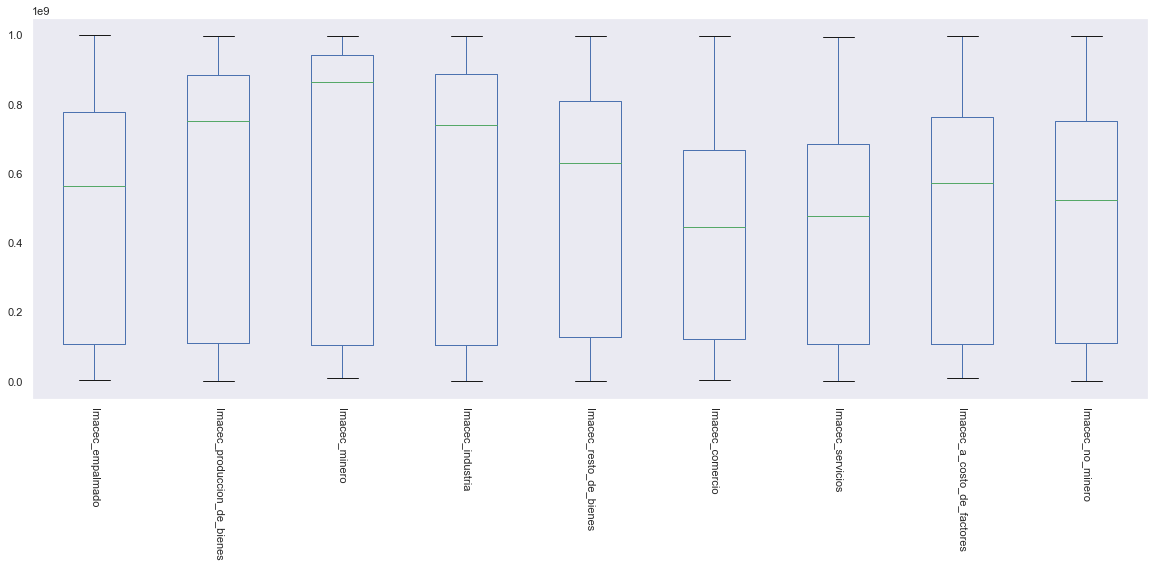

In [183]:
plotColumn(imacec_df)

In [184]:
index_of_type_columns = getColumnsByFamily(banco_central_dataset,'Indice_de_')

In [185]:
#Obtener un grafico representativo de los indices
index_df = banco_central_dataset[index_of_type_columns]
index_df.sample(5)

,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM
540,979755221.0,101201252.0,103064344.0,105968628.0,98257828.0,974024443.0,99801789.0,872747789.0
330,77758994.0,NaN,588667122.0,NaN,749489103.0,NaN,NaN,NaN
431,866074814.0,NaN,109909916.0,NaN,927713441.0,NaN,NaN,NaN
553,96523581.0,966288701.0,926341356.0,10411144.0,988458378.0,997429386.0,101065886.0,941587587.0
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En las columnas de Indices, el **Indice_de_produccion_industrial_electricidad__gas_y_agua** y el **Indice_de_ventas_comercio_real_IVCM** se concentran algunos valores por encima de los 0.8 x 10^9 de unidades y su media se encuentra por debajo de los 0.2 x 10^9

/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


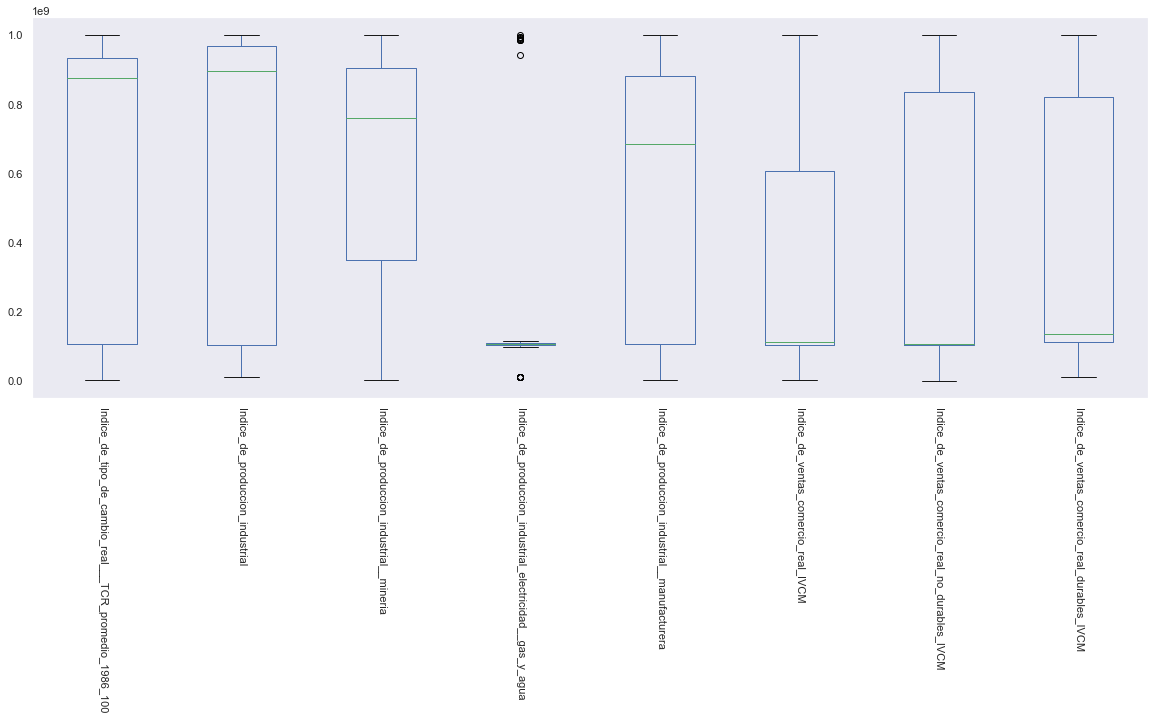

In [186]:
plotColumn(index_df)

In [187]:
pib_columns = getColumnsByFamily(banco_central_dataset,'PIB')

In [188]:
#Obtener un grafico representativo de los indices
pib_df = banco_central_dataset[pib_columns]
pib_df.sample(5)

,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,...,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB
308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


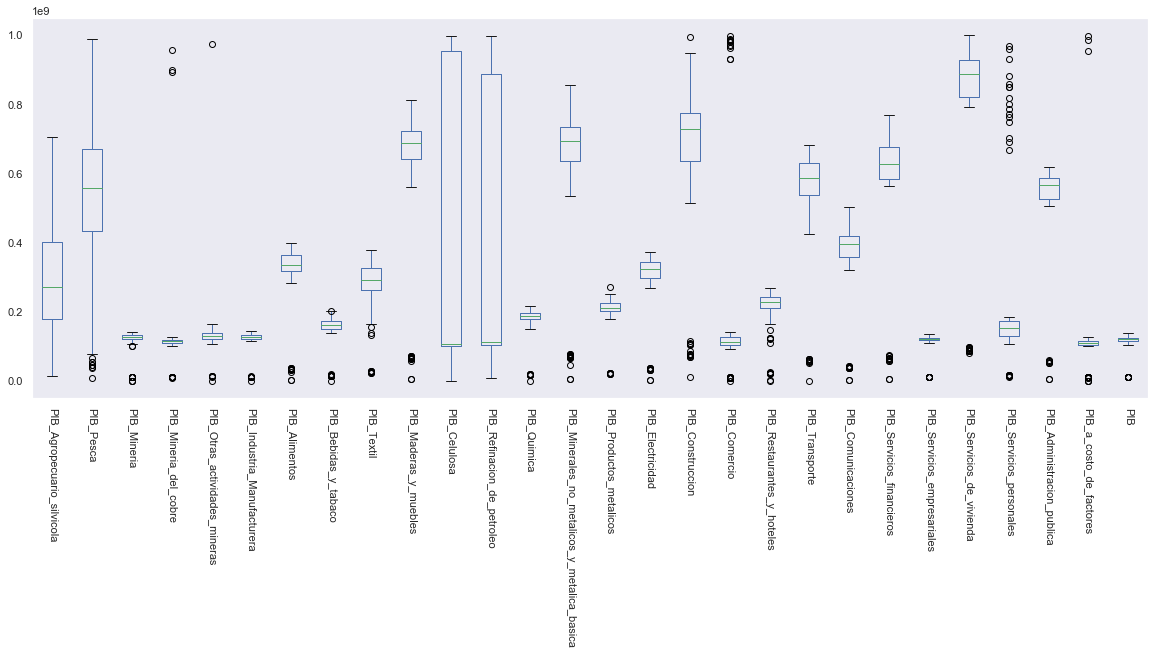

In [189]:
plotColumn(pib_df)

In [190]:
ocupacion_columns = getColumnsByFamily(banco_central_dataset,'Ocupacion')

In [191]:
#Obtener un grafico representativo de los indices
ocupacion_df = banco_central_dataset[ocupacion_columns]
ocupacion_df.sample(5)

,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,...,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE
596,640428548.0,234861489.0,856467155.0,435285983.0,241649229.0,297915329.0,77525851.0,164612138.0,162758745.0,560102952.0,...,759290823.0,172267313.0,530643655.0,532961264.0,819048173.0,556868981.0,128238355.0,268749784.0,353145094.0,150795138.0
543,726073807.0,245658222.0,919458116.0,472553065.0,204295552.0,253685742.0,654591339.0,180397871.0,16148685.0,525668183.0,...,700716892.0,157396004.0,449961316.0,473302892.0,649375096.0,447192234.0,931977677.0,245837591.0,335538299.0,195609401.0
494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


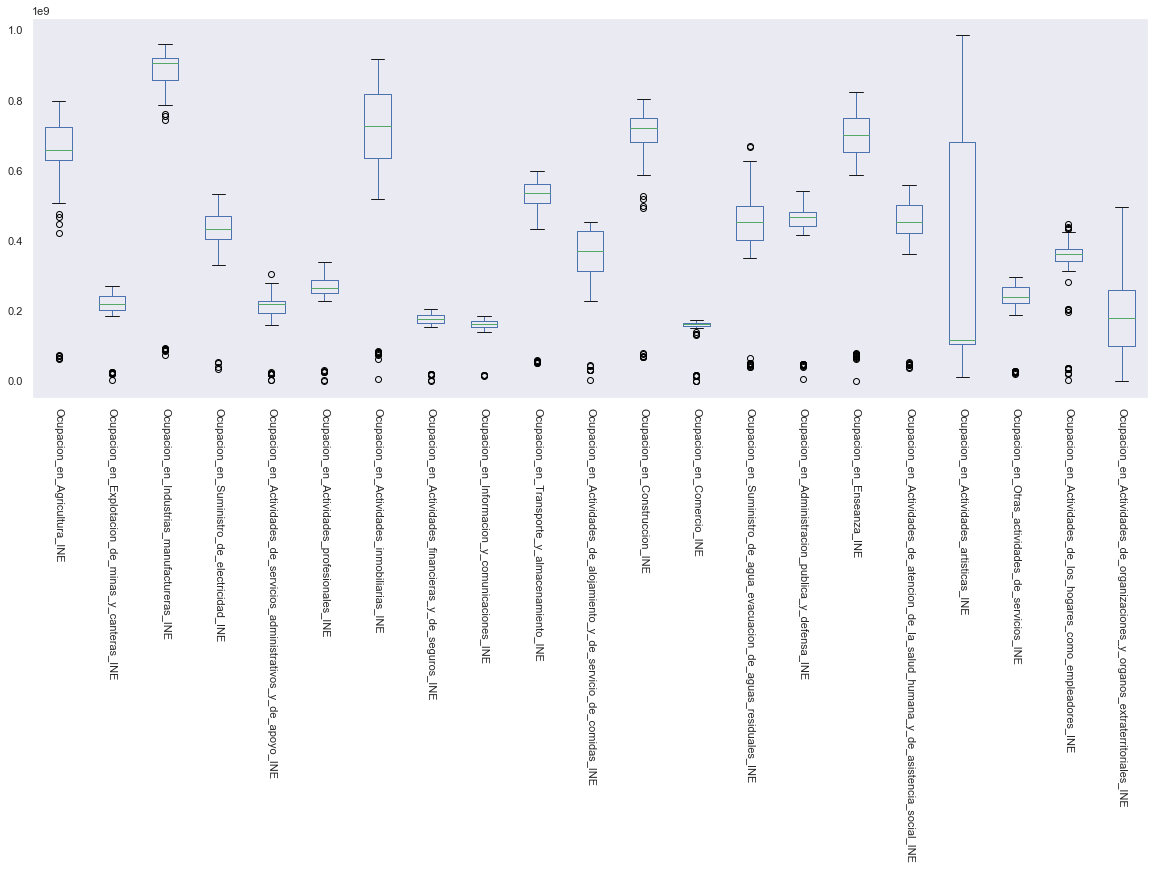

In [192]:
plotColumn(ocupacion_df)

In [193]:
precio_columns = getColumnsByFamily(banco_central_dataset,'Precio')

In [194]:
#Obtener un grafico representativo de los indices
precio_df = banco_central_dataset[precio_columns]
precio_df.sample(5)

,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN
303,15659.0,391.19,5.550,132.0,NaN,NaN,NaN,NaN,19.90,NaN
157,21849.0,491.11,13.960,747.0,NaN,NaN,NaN,NaN,NaN,NaN
225,12856.0,406.78,6.280,133.0,NaN,NaN,NaN,NaN,13.80,NaN
205,12745.0,401.09,5.480,63.0,NaN,NaN,NaN,NaN,17.80,NaN
571,43450332.0,1284.30,169.555,293848317.0,160.21,2.884,51.37,37445066.0,48.03,75.876


Del siguiente gráfico se puede concluir que los precios en todo el periodo evaluado se mantiene constante para todos, excepto para el precio del cobre refinado.

/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


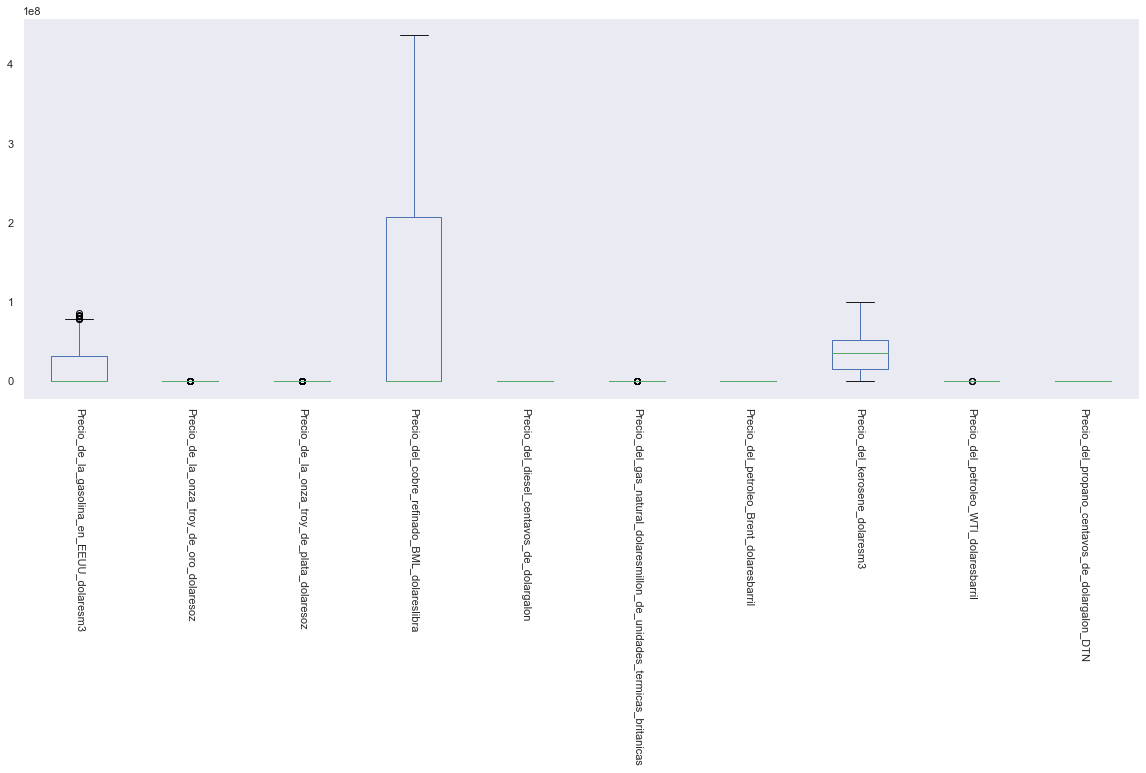

In [195]:
plotColumn(precio_df)

In [196]:
banco_central_dataset.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Mes
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.990000e+02,2.980000e+02,2.980000e+02,2.980000e+02,9.300000e+01,...,3.700000e+02,8.200000e+01,3.580000e+02,2.620000e+02,8.200000e+01,8.200000e+01,8.300000e+01,143.000000,612.000000,612.000000
mean,5.072617e+08,6.131057e+08,6.463457e+08,6.156182e+08,5.559412e+08,4.631133e+08,4.436989e+08,4.971921e+08,4.828639e+08,3.149198e+08,...,6.117409e+08,1.930041e+08,5.779954e+08,3.894410e+08,3.173688e+08,3.410729e+08,3.368105e+08,26565.412587,1995.000000,6.501634
std,3.184064e+08,3.454198e+08,3.775273e+08,3.437487e+08,3.126310e+08,2.946422e+08,3.068782e+08,3.198953e+08,3.121258e+08,1.868923e+08,...,3.292182e+08,2.810860e+08,3.419502e+08,2.041161e+08,3.726564e+08,3.835911e+08,3.719439e+08,7128.420440,14.731642,3.457717
min,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,...,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,4658.000000,1970.000000,1.000000
25%,1.096810e+08,1.104085e+08,1.066507e+08,1.070720e+08,1.292719e+08,1.218371e+08,1.094117e+08,1.084604e+08,1.102772e+08,1.787988e+08,...,3.495694e+08,1.019886e+08,1.068435e+08,3.221910e+08,1.036399e+08,1.023665e+08,1.105209e+08,23668.500000,1982.000000,3.750000
50%,5.655937e+08,7.525221e+08,8.648286e+08,7.408512e+08,6.301820e+08,4.465927e+08,4.797370e+08,5.723513e+08,5.244489e+08,2.710033e+08,...,7.588509e+08,1.056960e+08,6.828197e+08,4.463534e+08,1.105237e+08,1.061352e+08,1.353756e+08,27801.000000,1995.000000,6.500000
75%,7.780196e+08,8.853628e+08,9.427898e+08,8.885812e+08,8.096839e+08,6.690953e+08,6.876814e+08,7.632146e+08,7.513513e+08,4.033545e+08,...,9.051408e+08,1.101139e+08,8.799359e+08,5.482045e+08,6.055494e+08,8.333007e+08,8.190200e+08,31699.000000,2008.000000,9.250000
max,9.998748e+08,9.992728e+08,9.975769e+08,9.992121e+08,9.995847e+08,9.971810e+08,9.964286e+08,9.981539e+08,9.972512e+08,7.046145e+08,...,9.994139e+08,9.991563e+08,9.999838e+08,6.684895e+08,9.996093e+08,9.986254e+08,9.988942e+08,39263.000000,2020.000000,13.000000


### **Ahora observemos los datos de precipitaciones**

In [197]:
precipitaciones_dataset.sample(2)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
332,1987-08-01,112.174013,223.682873,288.917718,334.114125,291.852096,266.834608,248.593222,279.696408
36,1999-04-01,12.054248,14.514253,18.506409,16.072791,18.731331,35.717281,48.892041,68.924393


In [198]:
precipitaciones_dataset[['Anio', 'Mes']] = precipitaciones_dataset.date.str.split('-', expand=True)[[0, 1]]
precipitaciones_dataset = precipitaciones_dataset.sort_values(by=['Anio', 'Mes'], axis=0).reset_index(drop=True)

In [199]:
precipitaciones_dataset.sample(2)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Anio,Mes
34,1981-11-01,0.845013,1.700162,4.558121,7.826837,17.391772,17.261469,40.985400,82.916499,1981,11
32,1981-09-01,7.402608,10.701461,31.789128,44.713457,67.354542,79.256682,135.328028,237.384212,1981,09


### Se puede observar que
 - Coquimbo es la ciudad con la precipitacion en promedio más baja 
 - Los_Rios es la ciudad con la precipitacion promedio más alta
 - No hay registros faltantes



In [200]:
precipitaciones_dataset.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


A partir del siguiente gráfico se puede concluir que:

- Coquimbo eso uno de los lugares más secos pues presenta valores de precipitación bastante bajos
- Los Rios, por otro lado lugar húmedo, presenta valores de precipitación muy altos por encima del promedio del resto.
- El resto de ciudades presenta un promedio de precipitación de 0 a 150.

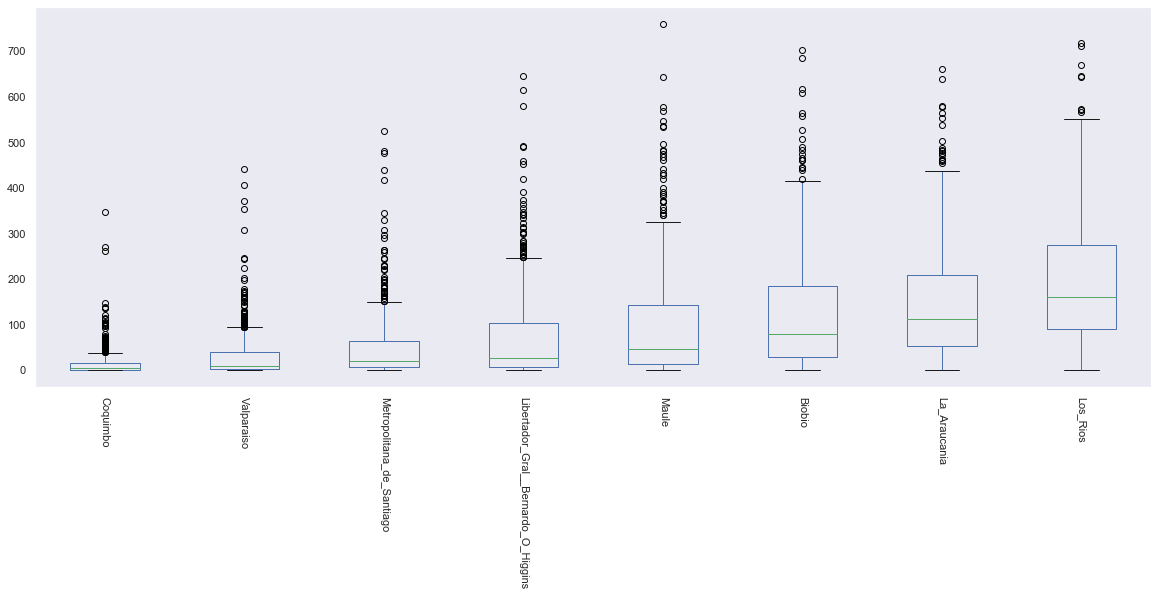

In [201]:
plotColumn(precipitaciones_dataset)

Verificaremos la estacionalidad de cada ciudad cada mes

En todas las ciudades es común que en el mes de mayo inicie el periodo húmedo.

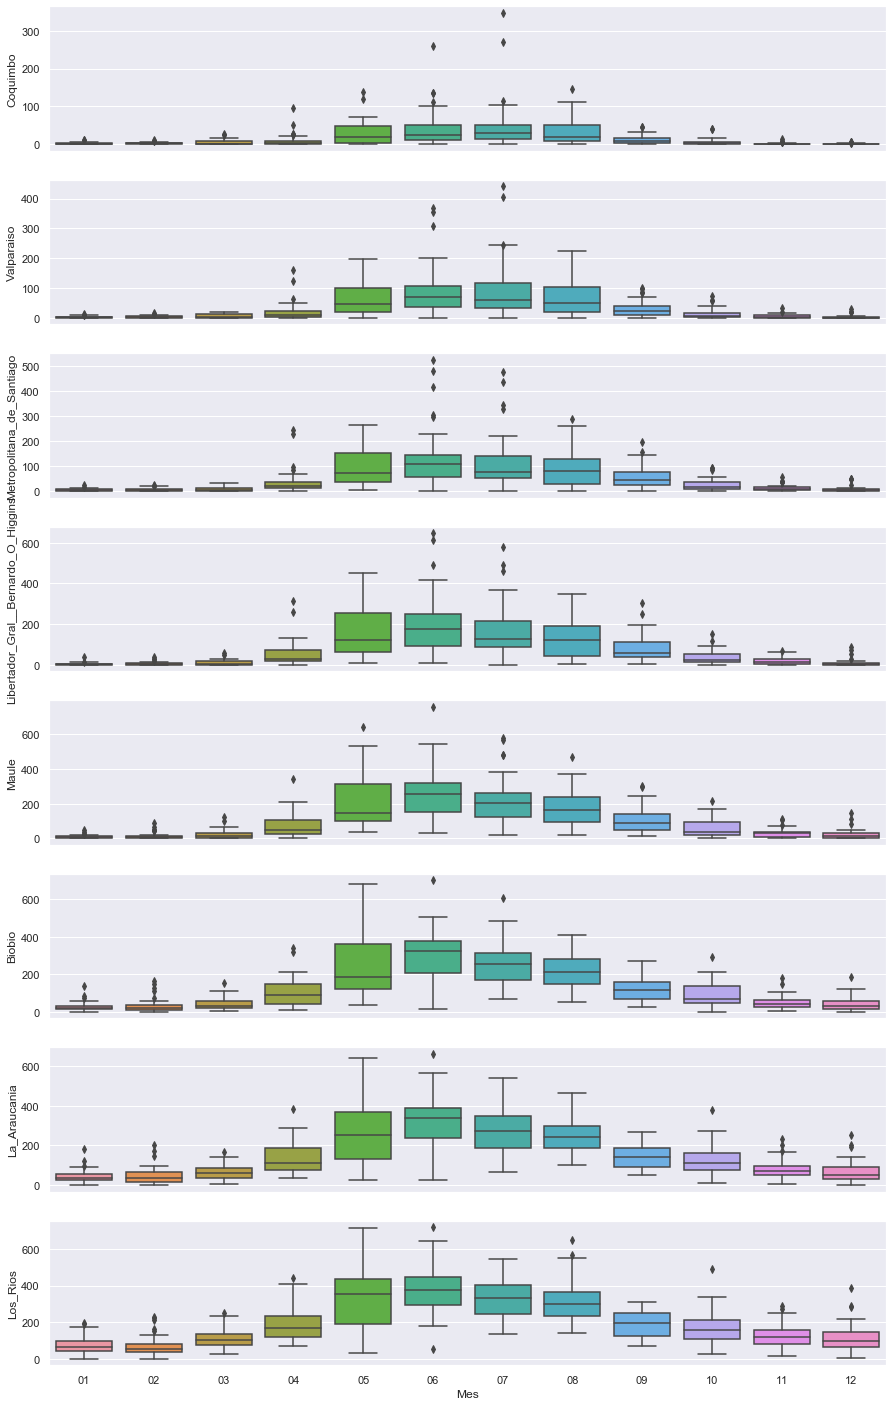

In [202]:
regions =[col for col in precipitaciones_dataset.columns if (col not in ['date','Anio','Mes'])]
fig, ejes = plt.subplots(len(regions),1,figsize=(15,25),sharex=True)
for region, eje in zip(regions,ejes):
    sns.boxplot(data=precipitaciones_dataset,x='Mes',y=region,ax=eje)
    if(eje!=ejes[-1]):
        eje.set_xlabel('')

# 3. Visualización

Crea una función que permita graficar series históricas de precipitaciones para un rango de fechas determinado. Para esto la función debe recibir como argumentos el nombre de una región, fecha de inicio y fecha de término (asegúrate de verificar en tu función que tanto el nombre de la región como las fechas ingresadas existan en el
dataset).

In [203]:
precipitaciones_dataset.sample(3)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Anio,Mes
269,2001-06-01,0.192379,3.262760,21.700268,57.106264,146.451090,278.215020,355.092726,439.501370,2001,06
179,1993-12-01,0.272333,3.232987,11.748507,27.297395,50.052737,56.329441,111.395552,144.260427,1993,12
207,1996-04-01,21.909222,26.389757,32.566191,38.467333,46.470466,86.184860,111.626809,152.552636,1996,04


In [204]:
def showHistoricSeries(df,regionName, startDate, endDate):
    regions =[col for col in df.columns if (col not in ['date','Anio','Mes'])]
    flagRegion = False if (regionName not in regions) else True
    flagstartDate = False if (startDate not in df.date.unique()) else True
    flagendDate = False if (endDate not in df.date.unique()) else True
    flagDates = False if (startDate > endDate) else True
    
    if(flagRegion==False | flagstartDate==False | flagendDate==False | flagDates==False):
        return 'La region y/o fechas ingresadas no son correctas'
    
    regionFilteredByDate = df[(df['date'] >= startDate) & (df['date'] <= endDate)][['date', regionName]] 
    regionFilteredByDate = regionFilteredByDate.reset_index(drop=True)
    #Seleccionando etiquetas para el eje X
    ticks = regionFilteredByDate[regionFilteredByDate['date'].str.contains('01-01')]['date']
    sns.set(rc={'figure.figsize':(20,7)})
    #Ploteo en base a la fecha
    graphFiltered = regionFilteredByDate.plot(x='date')
    graphFiltered.set_xticks(ticks.index)
    graphFiltered.set_xticklabels(ticks.values)
    #Defino ejes
    graphFiltered.set_xlabel('Fecha')
    graphFiltered.set_ylabel('Precipitaciones en mm')
    plt.xticks(rotation=90)
        

Usa esta función para graficar las precipitaciones para la Región Libertador General Bernardo O'Higgins y para la Región Metropolitana entre las fechas 2000-01-01 y 2020-01-01
- ¿ Qué observas con respecto a estacionalidades y tendencias?

**Respuesta**: Se observa que hay estacionalidad, pues existen movimientos de oscilación cada año. Pese a no ser la misma oscilación, se tiene la presencia de dichos movimientos de forma anual. Por otro lado, en el periodo evaluado no se puede percibir una tendencia, ya que los primeros cuatro años tiene una tendencia a la baja, luego, los siguientes sube y así se encuentra oscilando.

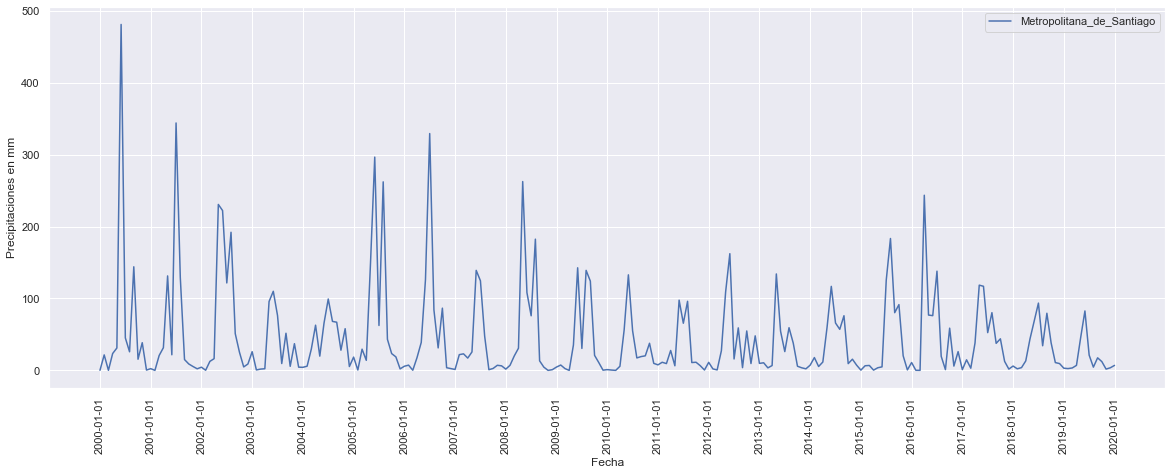

In [205]:
showHistoricSeries(precipitaciones_dataset,'Metropolitana_de_Santiago', '2000-01-01', '2020-01-01')

Crea una función que, para una región, grafique múltiples series de tiempo mensuales de precipitaciones, donde cada serie de tiempo corresponda a un año. La función debe recibir como argumento una lista con los años que queremos graficar (2000, 2005,..) y el nombre de la región. 

El eje X debe indicar los meses (enero,
febrero, etc...).

In [206]:
precipitaciones_dataset.sample(2)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Anio,Mes
160,1992-05-01,39.585549,112.954253,204.049463,373.557271,534.356389,617.324714,481.434578,388.167778,1992,05
457,2017-02-01,4.440510,5.574042,14.673758,14.810279,13.753186,31.641882,71.612871,121.597545,2017,02


In [207]:
def showMultipleSeriesTime(df,regionName, yearList):
    regions =[col for col in df.columns if (col not in ['date','Anio','Mes'])]

    if(regionName not in regions):
        return 'La region ingresada no se encuentra dentro del dataset'
    
    for year in yearList:
        if(year not in df.Anio.unique()):
            return 'El año ingresado no se encuentra dentro del listado'

    for year in yearList:
        year = int(year)
        setStartDateYear = date(year, 1, 1).strftime("%Y-%m-%d")
        setLastDate = date(year, 12, 31).strftime("%Y-%m-%d")
        regionFilteredByYear = df[(df['date'] >= setStartDateYear) & (df['date'] <= setLastDate)][['date', regionName]] 
        sns.set(rc={'figure.figsize':(20,7)})
        graphFiltered = regionFilteredByYear.plot(x='date')
        #Defino ejes
        graphFiltered.set_xlabel('Fecha')
        graphFiltered.set_ylabel('Precipitaciones en mm')
        plt.xticks(rotation=90)   
    

Usa esta función para graficar las precipitaciones para la Región del Maule durante
los años 1982, 1992, 2002, 2012 y 2019.
- ¿Qué puedes concluir de estos gráficos?

**Rpta**: Entre los meses de Abril y Octubre es la época de precipitaciones en Maule. También se puede observar que Mayo y Junio son los meses donde se presentan picos en el valor de la precipitación. Por último, hay dos peculariades; la primera es que en el año 2002 el pico de precipitación no fue entre Mayo y Junio, sino fue en Agosto; y la segunda es que al finalizar cada año se visualiza una tendencia a la baja en cada año; sin embargo, en el año 2012 no fue así, ya que tuvo tendencia a la alta.

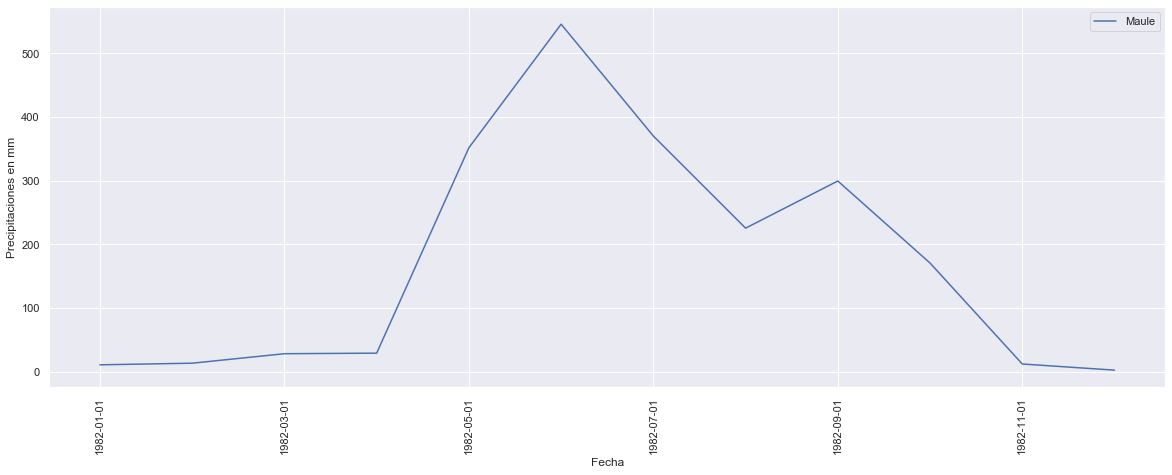

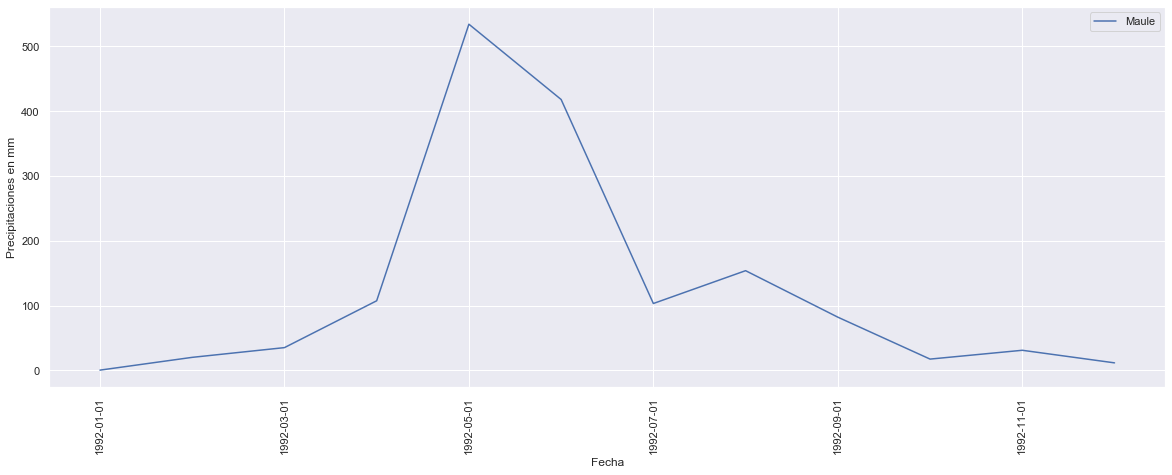

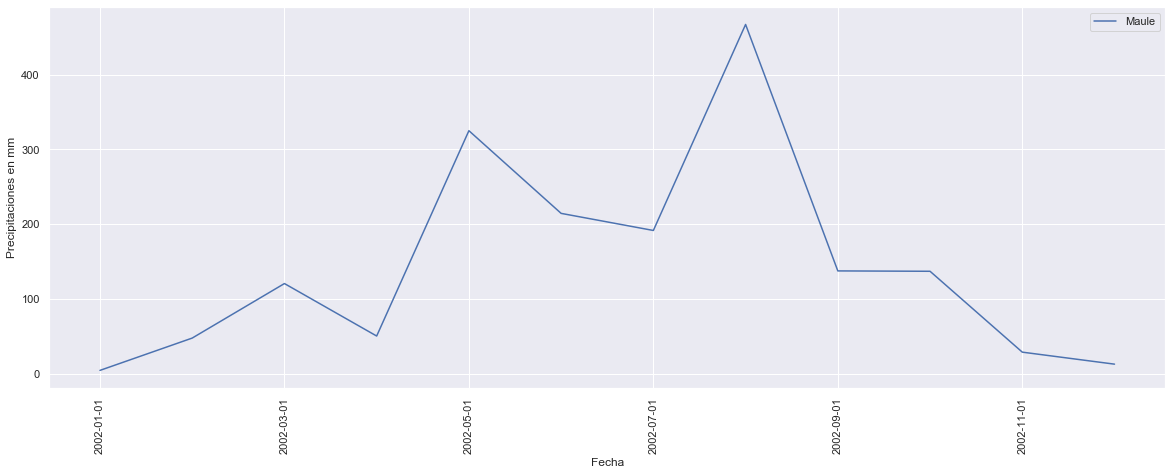

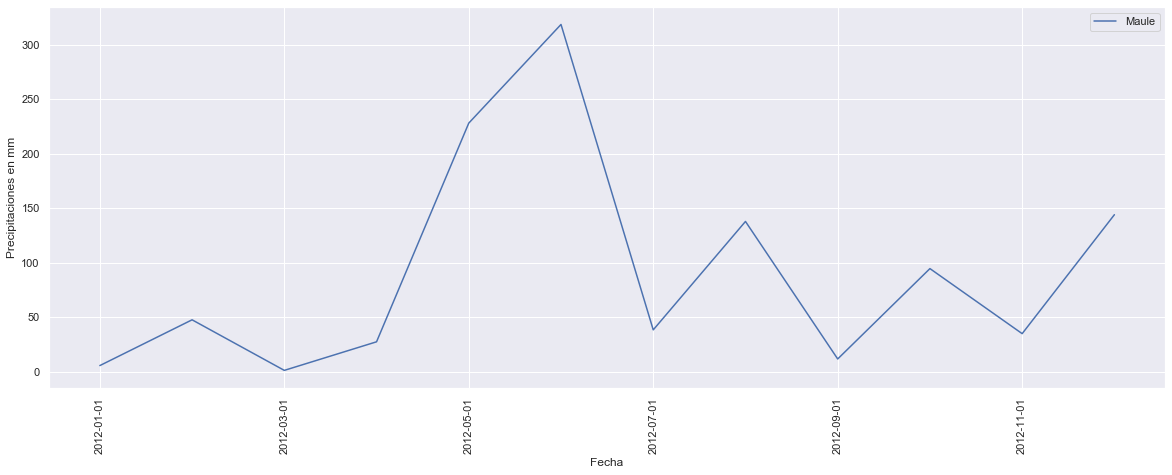

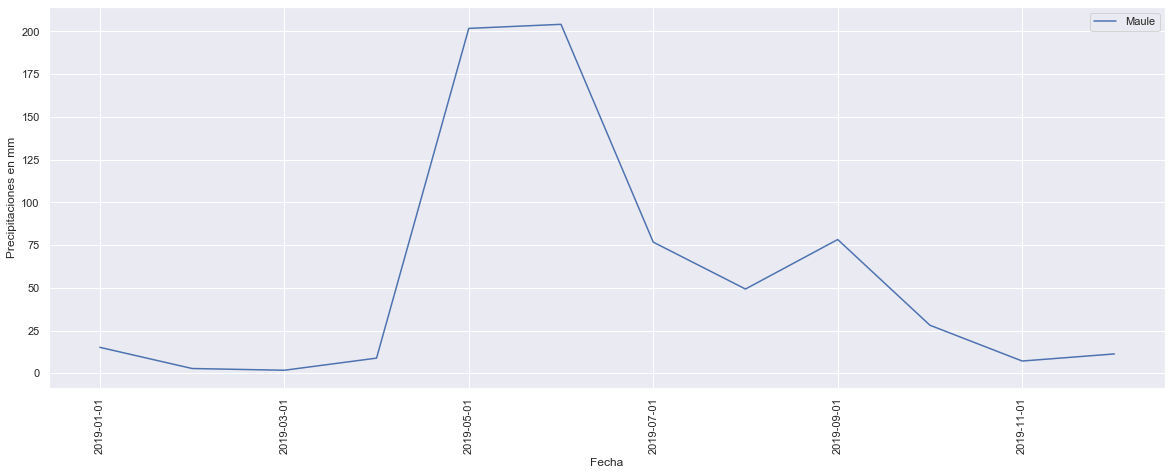

In [208]:
showMultipleSeriesTime(precipitaciones_dataset,'Maule', ['1982','1992','2002','2012','2019'])

Crea una función que permita visualizar dos series históricas de PIB para un rango de fechas determinado. Para esto la función debe recibir como input el nombre de cada serie, fecha de inicio y fecha de término.

In [209]:
banco_central_dataset.sample(3)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Mes
220,1988-05-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,5
311,1995-12-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,500907824.0,NaN,632035448.0,NaN,NaN,NaN,NaN,NaN,1995,12
249,1990-10-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,326934286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990,10


In [210]:
def showHistoricPIB(df,firstPIB, secondPIB,startDate, endDate="current"):

    if(firstPIB not in df.columns):
        return 'La columna '+firstPIB+' no se encuentra dentro del dataset'
    
    if(secondPIB not in df.columns):
        return 'La columna '+firstPIB+' no se encuentra dentro del dataset'
    
    if (startDate > endDate):
        return 'La fecha '+startDate+' debe ser menor a la fecha '+endDate
    
    #Se procede a retirar el valor UTC del campo Periodo para poder verificarlo en años
    df['Nuevo_Periodo'] = df['Periodo'].str.split(expand=True)[0]
    
    #En caso no se haya seleccionado una fecha maxima para la busqueda se colocara la mas actual del dataset
    if(endDate=="current"):
        endDate = df['Nuevo_Periodo'].max()
    
    #Se realiza el filtro en el periodo requerido por las columnas del PIB
    PIBFiltered = df[(df['Nuevo_Periodo'] >= startDate) & (df['Nuevo_Periodo'] <= endDate)][['Nuevo_Periodo', firstPIB,secondPIB]]
    PIBFiltered = PIBFiltered.reset_index(drop=True) #reiniciar los indices
    ticks = PIBFiltered[PIBFiltered['Nuevo_Periodo'].str.contains('01-01')]['Nuevo_Periodo']
    
    #Realizo el ploteo
    sns.set(rc={'figure.figsize':(20,7)})
    graphFiltered = PIBFiltered.plot(x='Nuevo_Periodo')
    graphFiltered.set_xticks(ticks.index)
    graphFiltered.set_xticklabels(ticks.values)
    
    #Defino ejes
    graphFiltered.set_xlabel('Periodo')
    graphFiltered.set_ylabel('Valores del PIB')
    plt.xticks(rotation=90)
    

Grafica las series de tiempo del PIB agropecuario y silvícola y la del PIB de Servicios
financieros desde el 2013-01-01 hasta la fecha más reciente en que haya datos.
 - ¿Qué puedes decir de cada serie en particular?
 
 **Rpta**: 
 Con respecto a la serie de PIB Agropecuario silvicola cada año presenta una tendencia a la baja, y énfasis en los meses donde las precipitaciones son altas. Y con respecto a la serie de PIB Servicios financieros cada año tiene comportamiento constante y a largo plazo se puede percibir tendencia a la alza.
 
 - ¿Hay alguna relación entre estas dos series?
 
 **Rpta**:
 Se puede observar que coinciden en los movimientos de cada pico, no en los valores pero si en el movimiento.

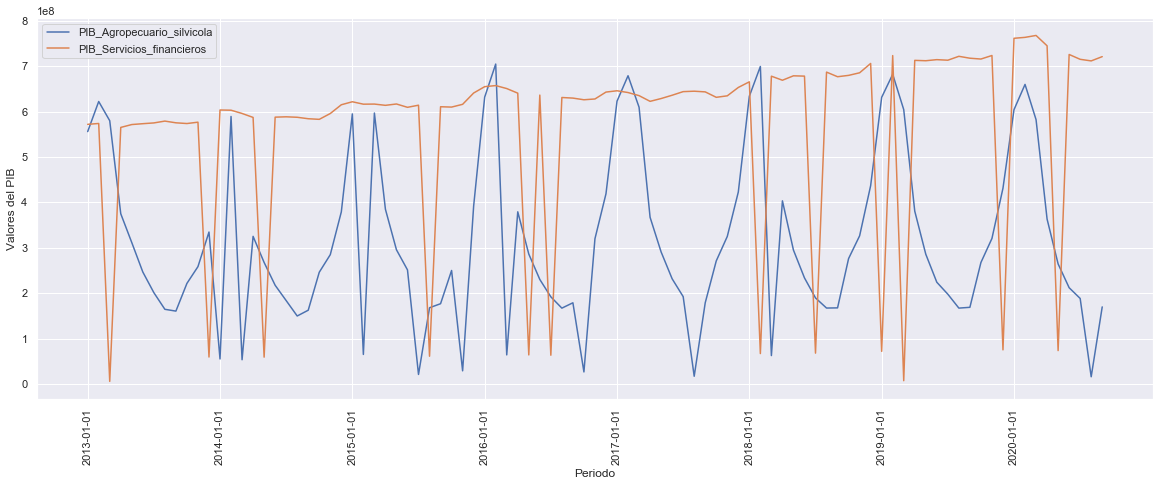

In [211]:
showHistoricPIB(banco_central_dataset,'PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros','2013-01-01')

# 4. Tratamiento y creación de variables


¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? 

**Rpta**:
La correlación se puede evaluar con el coeficiente de Pearson, Kendall Tau o Spearman. 
Para entrenar un modelo deberiamos escoger las caracteristicas con alta correlacion lo cual indica que su valor debe ser cercano a 1. Esta correlación cercana a 1 indicaría el nivel de influencia de la caracteristica en la variable objetivo.

¿Mucha correlación, no correlacionadas, da igual?

**Rpta**: Que la correlación entre una variable caracteristica y una variable objetivo sea 1 indica que ambas van en la misma dirección, que la correlación sea -1 indica que ambas van en diferente dirección y que la correlación sea 0 indica que no existe correlación alguna.

Para el entrenamiento del modelo, queremos predecir el precio de la leche para el
productor en Chile. Para eso, descarga el archivo precio_leche.csv y haz un merge con
las bases de datos de precipitaciones y datos del Banco Central.

In [212]:
leche_dataset = pd.read_csv('precio_leche.csv') 
leche_dataset.sample(5)
leche_dataset.shape

(506, 3)

Este archivo tiene una columna de año, mes y precio_leche (que corresponde al precio nominal, sin IVA, en pesos chilenos por litro), por lo que vas a tener que crear la columna de fecha que calce con la de las otras bases.

Crea las variables:
 - A partir de la variable fecha, crea nuevas variables para el año, mes, trimestre.

In [213]:
meses = {'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'}
trimestre = {'Ene': '01', 'Feb': '01', 'Mar': '01', 'Abr': '02', 'May': '02', 'Jun': '02', 'Jul': '03', 'Ago': '03', 'Sep': '03', 'Oct': '04', 'Nov': '04', 'Dic': '04'}
leche_dataset['Mes_nombre'] = leche_dataset['Mes']
leche_dataset['Mes'] = leche_dataset['Mes'].replace(meses)
leche_dataset['Trimestre'] = leche_dataset['Mes_nombre'].replace(trimestre)
leche_dataset['Anio'] = leche_dataset['Anio'].astype(str)

In [214]:
leche_dataset.sample(4)

,Anio,Mes,Precio_leche,Mes_nombre,Trimestre
486,2019,07,266.63,Jul,03
482,2019,03,240.39,Mar,01
416,2013,09,202.58,Sep,03
196,1995,05,95.63,May,02


#### Realizando el merge del dataset de leche, banco central y precipitaciones

Obteniendo las columnas de las ciudades

In [215]:
regions =[col for col in precipitaciones_dataset.columns if (col not in ['date','Anio','Mes'])]

Obteniendo las caracteristicas del dataset del banco central

In [216]:
bank_columns =[col for col in banco_central_dataset.columns if (col not in ['Periodo', 'Nuevo_Periodo'])]

Nos aseguramos que las columnas Anio y Mes de los tres dataset sean de tipo integer

In [217]:
banco_central_dataset['Anio'] = banco_central_dataset['Anio'].astype(int)
banco_central_dataset['Mes'] = banco_central_dataset['Mes'].astype(int)
precipitaciones_dataset['Anio'] = precipitaciones_dataset['Anio'].astype(int)
precipitaciones_dataset['Mes'] = precipitaciones_dataset['Mes'].astype(int)
leche_dataset['Anio'] = leche_dataset['Anio'].astype(int)
leche_dataset['Mes'] = leche_dataset['Mes'].astype(int)

Unimos el dataset de precios de leche en base a la columna en común que es Anio y Mes junto con el dataset de precipitaciones


In [218]:
df_complete = pd.merge(leche_dataset, precipitaciones_dataset[['Anio', 'Mes'] + regions], how="right", on=['Anio', 'Mes'])

Unimos el dataset anterior con el dataset del banco central

In [219]:
df_complete = pd.merge(df_complete, banco_central_dataset[bank_columns], how="right", on=['Anio', 'Mes'])

Verificamos que no exista nulos en la columna de precios de la leche

In [220]:
df_complete = df_complete[df_complete['Precio_leche'].notna()]

In [221]:
df_complete = df_complete.sort_values(['Anio', 'Mes']).reset_index(drop=True)
df_complete.shape

(496, 97)

In [222]:
df_complete.head()

,Anio,Mes,Precio_leche,Mes_nombre,Trimestre,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1979,1,3.85,Ene,01,2.641948,0.587062,2.447114,1.608992,3.736215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,2,4.58,Feb,01,1.179804,2.432192,3.997852,4.346310,16.347637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,3,5.18,Mar,01,0.255490,0.020601,0.000000,0.055488,0.545324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979,4,6.06,Abr,02,10.173699,11.745779,13.722349,12.989194,21.880607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979,5,7.25,May,02,1.039098,18.609286,50.187148,104.451550,143.914334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Crea las variables
  - Lags y estadísticas acumuladas (por ejemplo: promedio, varianza) de las variables que consideres relevantes.

El siguiente grafico muestra el precio de la leche a lo largo de los años

Se puede observar que el precio de la leche en los primeros 30 años aumentaba en 50 unidades cada 10 años, sin embargo, los ultimos 10 años (2010-2020) el precio de la leche ha crecido el triple de lo que solia crecer cada 10 años.

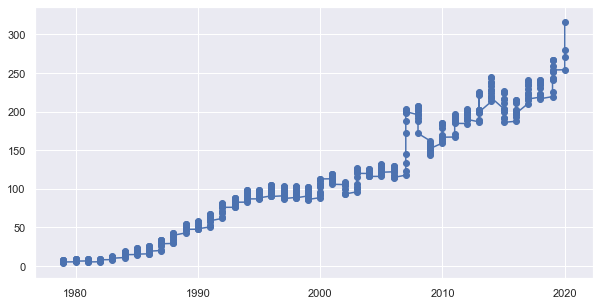

In [223]:
plt.subplots(figsize=(10, 5))
plt.plot(df_complete.Anio, df_complete.Precio_leche)
plt.scatter(df_complete.Anio, df_complete.Precio_leche)
plt.show()

Entre el 2010 y 2014 tiene una tendencia a la alza el precio de la leche; luego entre el 2015 y 2016 cae el precio, lo cual pudo significar un punto en el tiempo relevante para el precio de la leche. El 2020 definitivamente es un punto en el tiempo que salta por encima de todo debido al inicio de la pandemia


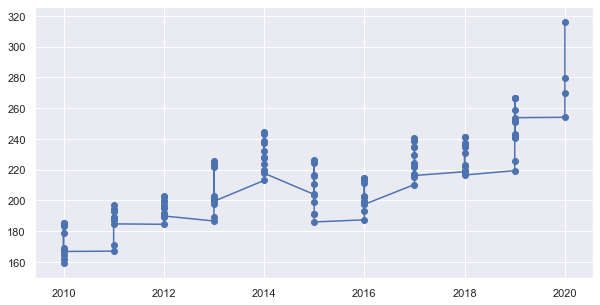

In [224]:
df_complete_higher_2010 = df_complete[df_complete['Anio']>=2010]
plt.subplots(figsize=(10, 5))
plt.plot(df_complete_higher_2010.Anio, df_complete_higher_2010.Precio_leche)
plt.scatter(df_complete_higher_2010.Anio, df_complete_higher_2010.Precio_leche)
plt.show()

Aplicando la correlacion con el método de Pearson se puede verificar que las columnas de precio y venta de autos nuevos tienen alta correlación  (van en el mismo sentido) que la variable de precio de la leche.

In [289]:
dfcorr = df_complete.corr()[['Precio_leche']].sort_values(by=['Precio_leche'], ascending=False)
dfcorr

,Precio_leche
Precio_leche,1.000000
Anio,0.975805
Precio_de_la_onza_troy_de_oro_dolaresoz,0.808329
Precio_del_cobre_refinado_BML_dolareslibra,0.794309
Precio_del_petroleo_WTI_dolaresbarril,0.730055
...,...
Indice_de_produccion_industrial,-0.307627
Imacec_servicios,-0.325455
Imacec_a_costo_de_factores,-0.366108
Precio_del_propano_centavos_de_dolargalon_DTN,-0.367841


Elimino las columnas que tenga la correlacion mayor a -0.2 y menor a 0.2

In [313]:
corr = df_complete.corr()[['Precio_leche']]
uncorr_cols = list(corr[(corr['Precio_leche'] > -0.2) & (corr['Precio_leche'] <= 0.2)].index)


In [314]:
df_good_correlation = df_complete.drop(uncorr_cols, axis=1)

In [315]:
df_good_correlation.shape

(496, 38)

Se escogieron las siguientes columnas ya que tienen alta correlación y tienen pocas cantidades de nulos

In [317]:
allcolumns = ['Trimestre','Anio','Precio_leche','Precio_de_la_gasolina_en_EEUU_dolaresm3','Precio_de_la_onza_troy_de_oro_dolaresoz','Precio_de_la_onza_troy_de_plata_dolaresoz','Precio_del_cobre_refinado_BML_dolareslibra','Precio_del_petroleo_WTI_dolaresbarril','Tipo_de_cambio_del_dolar_observado_diario','Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100','Indice_de_produccion_industrial__mineria']
columnsToTrain = ['Precio_de_la_gasolina_en_EEUU_dolaresm3','Precio_de_la_onza_troy_de_oro_dolaresoz','Precio_de_la_onza_troy_de_plata_dolaresoz','Precio_del_cobre_refinado_BML_dolareslibra','Precio_del_petroleo_WTI_dolaresbarril','Tipo_de_cambio_del_dolar_observado_diario','Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100','Indice_de_produccion_industrial__mineria']


Se eliminan las columnas que no sean las anteriores

In [318]:
for col in df_good_correlation:
    if(col not in allcolumns):
        df_good_correlation = df_good_correlation.drop(col, axis=1)

In [319]:
df_good_correlation.shape

(496, 11)

In [322]:
df_good_correlation_not_nan = df_good_correlation.dropna()
df_good_correlation_not_nan.shape

(364, 11)

In [323]:
for c in columnsToTrain:
    df_good_correlation_not_nan[f'{c}_promedio_semestre'] = df_good_correlation_not_nan[c].rolling(window=6).mean().fillna(0)
    df_good_correlation_not_nan[f'{c}_std_semestre'] = df_good_correlation_not_nan[c].rolling(window=6).std().fillna(0)

/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lourdesmontalvo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [324]:
df_good_correlation_not_nan.shape

(364, 27)

In [325]:
df_good_correlation_not_nan.sample(5)

,Anio,Precio_leche,Trimestre,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_petroleo_WTI_dolaresbarril,Tipo_de_cambio_del_dolar_observado_diario,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,...,Precio_del_cobre_refinado_BML_dolareslibra_promedio_semestre,Precio_del_cobre_refinado_BML_dolareslibra_std_semestre,Precio_del_petroleo_WTI_dolaresbarril_promedio_semestre,Precio_del_petroleo_WTI_dolaresbarril_std_semestre,Tipo_de_cambio_del_dolar_observado_diario_promedio_semestre,Tipo_de_cambio_del_dolar_observado_diario_std_semestre,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100_promedio_semestre,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100_std_semestre,Indice_de_produccion_industrial__mineria_promedio_semestre,Indice_de_produccion_industrial__mineria_std_semestre
284,2002,99.47,03,20.0,0.0,0.0,67.0,0.0,726.0,101.0,...,59.833333,26.041633,0.0,0.0,463.333333,357.425610,661.833333,436.115772,749.500000,36.231202
216,1997,90.87,01,0.0,0.0,0.0,0.0,0.0,423.0,833.0,...,0.000000,0.000000,0.0,0.0,276.666667,214.349870,836.166667,3.544949,492.000000,214.624323
399,2012,199.93,02,81.0,0.0,0.0,374.0,0.0,0.0,906.0,...,313.333333,137.639626,0.0,0.0,415.333333,203.926130,644.833333,428.179129,774.000000,329.610679
444,2016,187.38,01,2.0,0.0,0.0,202.0,0.0,0.0,985.0,...,221.833333,14.427982,0.0,0.0,461.333333,357.406025,676.333333,482.524473,376.000000,463.332710
297,2003,123.16,04,22.0,0.0,0.0,87.0,0.0,646.0,100.0,...,67.833333,30.056059,0.0,0.0,226.833333,346.437536,104.500000,2.949576,824.833333,27.549350


# 5. Modelo 

Entrena un modelo que permita predecir el precio de la leche el próximo mes, en función de los datos entregados.
- Si necesitas crear variables adicionales que pueden aportar información al modelo, tienes total libertad.

In [326]:
from sklearn.ensemble import RandomForestRegressor

Construye una base de test (o de cross validation). 

¿Cuál fue tu definición de tiempo/cantidad de datos para este set de datos? Explica por qué la elegiste así.

**Rpta**: Elegi registros del menores del 2018 para poder realizar el entrenamiento lo cual fue un 92% de los registros. El resto se utilizó para la validación. Lo elegí de esta forma para el algoritmo pueda tener mayor cantidad de registros para el entrenamiento

In [353]:
train = df_good_correlation_not_nan[df_good_correlation_not_nan['Anio'] < 2018].copy()
test = df_good_correlation_not_nan[df_good_correlation_not_nan['Anio'] >= 2018].copy()

In [354]:
total = (train.shape[0]/(train.shape[0] + test.shape[0]))*100
total

92.3076923076923

¿Qué datos adicionales te gustaría tener? 

**Rpta**: 

- Información sobre los productores de leche como los ganaderos, por ejemplo aqui en Perú suelen a ver huelgas que influyen y detienen la producción de ciertos productos.
- Información sobre los fenomenos ambientales como los huaycos, lluvias torrenciales que tambien influyen en el precio de la leche.

¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?

**Rpta**: 
- Los precios de la gasolina, petroleo, indice de tipo de cambio.

In [355]:
X_train, y_train = train.drop(['Precio_leche'], axis=1), train['Precio_leche']
X_test, y_test = test.drop(['Precio_leche'], axis=1), test['Precio_leche']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((336, 22), (336,), (28, 22), (28,))

In [356]:
reg = RandomForestRegressor(n_estimators=5000,max_depth=100, random_state=42,criterion='mse')
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [357]:
from sklearn.metrics import mean_squared_error

¿Cómo evalúas el resultado del modelo?

¿Qué métricas tiene sentido mirar?

**Rpta:**
Como estamos prediciendo los precios de la leche estamos hablando de un modelo de regresión el cual es necesario medir con la métrica de mse (error cuadratico medio). Para esta evaluación se ha obtenido un mse de 35.15

In [358]:
mse = mean_squared_error(y_train,reg.predict(X_train))
print('Train error (mse) es %0.2f'%(np.sqrt(mse)))
mse = mean_squared_error(y_test,reg.predict(X_test))
print('Test error (mse) es %0.2f'%(np.sqrt(mse)))

Train error (mse) es 2.68
Test error (mse) es 35.15


¿Para qué aplicaciones puede servir un modelo de este tipo?

En particular, ¿Cómo podría ayudar a combatir el cambio climático?

**Rpta**
Este trabajo podría ser utilizado en un aplicativo movil para que muchas familias puedan consultar tanto este producto como otros basicos en la canasta familiar. Seria interesante poder visualizar la simulacion de precios de la siguiente semana para que puedan anticiparse y con ello organizar las finanzas familiares.

Directamente a combatir el cambio climático, por ahora no veo una aplicación directa, pero lo que si percibo es que el cambio climatico impacta directamente a que no crezca el alimento de la vaca; y con ello las vacas dejarían de comer y por consecuencia reducir la produccion de leche; y con ello probablemente el alza de precios.


